# Laboratorio 5 - Minería de Textos y Análisis de Sentimientos

### Sebastian Juarez - 21471
### Juan Pablo Cordón - 21458

Link al repositorio de Github: https://github.com/SebasJuarez/DS-Collection/tree/Lab5

## Avances

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data/train.csv")

print(df.shape)
df.head()


(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


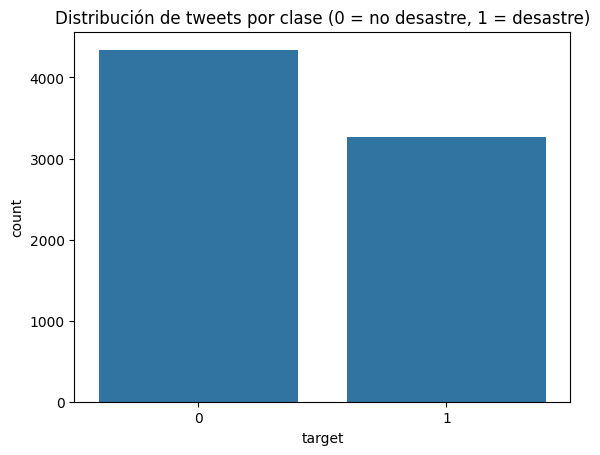

target
0    57.034021
1    42.965979
Name: proportion, dtype: float64

In [ ]:
df.info()

df.isnull().sum()

sns.countplot(x="target", data=df)
plt.title("Distribución de tweets por clase (0 = no desastre, 1 = desastre)")
plt.show()

df["target"].value_counts(normalize=True) * 100


In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)
df[["text", "clean_text"]].head()


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders in ...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


### Inicio de tokenización

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_vectorizer = CountVectorizer(max_features=5000, stop_words="english")
X_bow = bow_vectorizer.fit_transform(df["clean_text"])

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

print("Shape BoW:", X_bow.shape)
print("Shape TF-IDF:", X_tfidf.shape)


Shape BoW: (7613, 5000)
Shape TF-IDF: (7613, 5000)
